In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.dummy import DummyClassifier
import mpld3
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("cases_deaths.csv")
df1 = pd.read_csv("state_action.csv")

In [3]:
df2 = df.drop(df.index[0])
cases = df2.set_index("Location")
cases['Number of COVID-19 Cases'] = cases['Number of COVID-19 Cases'].str.replace(',', '')
cases['Number of COVID-19 Cases'] = cases['Number of COVID-19 Cases'].astype(float)

In [4]:
df3 = df1.drop(df1.index[0])
df4 = df3.set_index("Location")
actions = df4.drop(columns=['Primary Election Postponement'])

In [23]:
combined = pd.merge(left=cases, right=actions, how='outer', on="Location")
new_data = combined.dropna()
new_df = new_data.replace('-',"Unknown")
new_df

,Number of COVID-19 Cases,"COVID-19 Cases per 1,000,000 Population",Deaths from COVID-19,"COVID-19 Deaths per 1,000,000 Population",Stay At Home Order,Mandatory Quarantine for Travelers,Non-Essential Business Closures,Large Gatherings Ban,State-Mandated School Closures,Bar/Restaurant Limits,Emergency Declaration
Location,,,,,,,,,,,
Alabama,4655.0,949.382901,153,31.204207,Statewide,Unknown,All Non-Essential Businesses,>10 People Prohibited,Yes,Closed except for takeout/delivery,Yes
Alaska,314.0,429.228551,9,12.302729,Statewide,All Travelers,All Non-Essential Businesses,All Gatherings Prohibited,Yes,Closed except for takeout/delivery,Yes
Arizona,4724.0,649.015479,180,24.729633,Statewide,From Certain States,All Non-Essential Businesses,>10 People Prohibited,Yes,Closed except for takeout/delivery,Yes
Arkansas,1744.0,577.903668,38,12.591938,Unknown,Unknown,Unknown,>10 People Prohibited,Yes,Closed except for takeout/delivery,Yes
California,29890.0,756.474775,1065,26.953685,Statewide,Unknown,All Non-Essential Businesses,All Gatherings Prohibited,Effectively Closed,Closed except for takeout/delivery,Yes
Colorado,9047.0,1571.004470,389,67.549546,Statewide,Unknown,All Non-Essential Businesses,All Gatherings Prohibited,Yes,Closed except for takeout/delivery,Yes
Connecticut,16809.0,4714.627462,1036,290.579692,Statewide,Unknown,All Non-Essential Businesses,Other,Yes,Closed except for takeout/delivery,Yes
Delaware,2323.0,2385.588294,61,62.643515,Statewide,All Travelers,All Non-Essential Businesses,>10 People Prohibited,Yes,Closed except for takeout/delivery,Yes
District of Columbia,2666.0,3777.546975,91,128.941026,Statewide,Unknown,All Non-Essential Businesses,>10 People Prohibited,Yes,Closed except for takeout/delivery,Yes


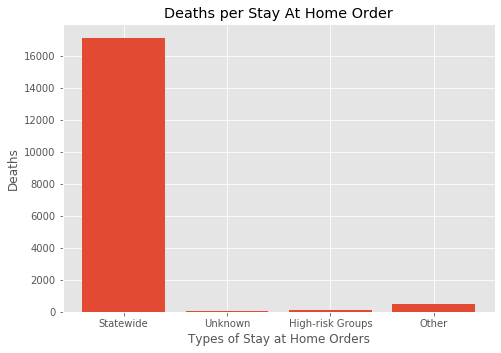

In [6]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(new_df["Stay At Home Order"],new_df["Deaths from COVID-19"])
plt.title('Deaths per Stay At Home Order')
plt.xlabel('Types of Stay at Home Orders')
plt.ylabel('Deaths')
plt.show()

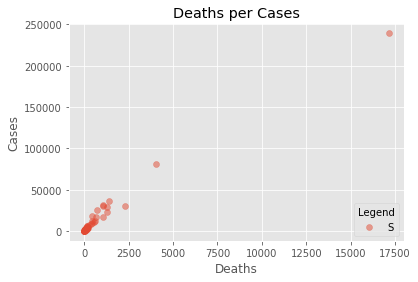

In [26]:
plt.scatter(new_df["Deaths from COVID-19"],new_df["Number of COVID-19 Cases"] , alpha=0.5)
plt.title('Deaths per Cases')
plt.xlabel('Deaths')
plt.ylabel('Cases')
plt.legend("States", loc="lower right",title="Legend")
plt.show()

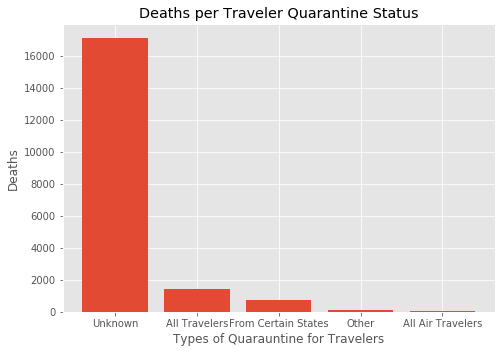

In [8]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(new_df["Mandatory Quarantine for Travelers"],new_df["Deaths from COVID-19"])
plt.title('Deaths per Traveler Quarantine Status')
plt.xlabel('Types of Quarauntine for Travelers')
plt.ylabel('Deaths')
plt.show()

A lot less of deaths for all air travelers and even all travlers

In [8]:
new_df.describe()

,Number of COVID-19 Cases,"COVID-19 Cases per 1,000,000 Population",Deaths from COVID-19,"COVID-19 Deaths per 1,000,000 Population"
count,51.000000,51.000000,51.000000,51.000000
mean,14219.058824,1766.837133,742.509804,78.860727
std,35125.842357,2222.475845,2443.549274,143.092991
min,305.000000,390.572029,2.000000,3.455670
25%,1727.500000,626.555394,40.500000,19.311451
50%,4177.000000,926.099498,142.000000,30.664733
75%,12030.500000,1703.597978,503.500000,68.593023
max,239306.000000,12301.398186,17131.000000,880.609982


In [9]:
t = 142.0

In [10]:
new_df = pd.get_dummies(new_df)

In [11]:
new_df['deaths'] = new_data['Deaths from COVID-19'].apply(lambda x: 1 if x > t else 0)

In [12]:
y = new_df['deaths']
X = new_df.drop(columns=['deaths','Deaths from COVID-19']).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
clf = tree.DecisionTreeClassifier()
model = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.9090909090909091

In [14]:
base_x, base_y = new_df.drop(columns=['deaths']).values, new_df['deaths']
base_x_train, base_x_test, base_y_train, base_y_test = train_test_split(X,y, random_state=0)
dummy = DummyClassifier(strategy='uniform', random_state=1)
dummy.fit(base_x_train,base_y_train)
dummy.score(X_test, y_test)

0.2727272727272727

### Evaluating Test Data
* The data accuracy gave me between 0.72 and 1.0 
* I would say this is a pretty good classifier and it was way higher than my baseline classifier which was .27
* I think my model learned how to split the data down 

[Text(133.92000000000002, 190.26, 'X[0] <= 3208.5\ngini = 0.495\nsamples = 40\nvalue = [22, 18]'),
 Text(66.96000000000001, 135.9, 'gini = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(200.88000000000002, 135.9, 'X[2] <= 23.921\ngini = 0.18\nsamples = 20\nvalue = [2, 18]'),
 Text(133.92000000000002, 81.53999999999999, 'X[1] <= 728.483\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(66.96000000000001, 27.180000000000007, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(200.88000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(267.84000000000003, 81.53999999999999, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]')]

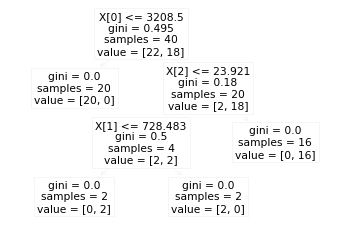

In [15]:
tree.plot_tree(model)

### Questions
**What does it mean that the number of cases is the most informative feature for predicting if there were t or more deaths?**
It means that the cases have a significant impact on whether or not more that t people will die. So, it would make sense that the higher number of cases there are the better chance you have that t or more people have died from the disease. Obviously if you have less than t cases then the classifier will be able to determine if t deaths will occur.

**Why do you think using the 50th percentile for t was appropriate?**
I think this was an appropriate scale for t becasue this is about the average (not the mean) but the general amount of deaths that are going to be seen.

**How many states is 10% of the data? Is that enough to get a good indication of whether or not your model is working? What if you tried a cross-validation?**
10% is 5 states. I do not think this is enough to calculate a good model becasue you could have a very rural states in the 10% that maybe do not see a lot of travelers or you could have the opposite and end up with the top 5 infected states so it would skew the data a lot in my opinion. I think cross-validation would be good because it would look at the data set as a whole and gernelize it to see sort of the normal or expected sample. 

**How well does your model perform if you remove the number of cases as a feature? What does this say about our hypothesis that the state actions can predict if a state will have had t deaths or more?**
If you do not have the cases as the feature the data set performed just as wel, the feature it chose to predict was the number of deaths. This set was in between .7 and 1.0 so very similar to the X[0] data. I think this tells us that the state action does actually help becasue it is preventing less death, especcially in high impact areas like New York or California. 

**What do you interpret your model is learning when the number of cases are present as a feature? What do you interpret your model is learning when the number of cases is not included as a feature? What does that say about the data?** 
When the cases feature is present the model is learning to predict that when the cases are at a certain threshold they will have more than t deaths. That threshold is what the model is learning. When cases is not a ferature like I had at first (deaths was the feature) it is interpreting pretty much whether or not there were more than t deaths that occured. I think this tells us that the data can predict or be accurate enough with either type as a feature. The cases are probably better for the classifier to learn becasue that way you can predict how many deaths there will be in the future so it will be more useful than just guessing with deaths that have already happened like I had originally.

**Based on what you understand about Logistic Regression, could you make a similar interpretation if you had used Logistic Regression instead of Decision Trees as your classifier?**
I think I could becasue linear is pretty much a "yes" or "no" and decision trees are kind of like that because its a bunch of branches of "yeses" or "nos" the Decision Tree is probably going to be more accurate because it can use multiple features as it branches like seen above in the graphic whereas Linear uses just one major feature to make its decisions.

**What else could this data tell you?** I think this data tells us the importance of social distancing and how it can help save lives. For example, California who has a high density of people in Southern California and the Bay Area actually have a pretty mild amount of cases and they were quick to close down businesses and go into quaruintine. Other states who were slower to react are facing those reprecutions now with higher case rate and death rate. 